### Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Lectura datos (2 archivos .json)
Convertir ambos a df y realizar el preprocesamiento necesario.

In [2]:
# Leer archivo JSON 1 y cargar datos en un DataFrame
events = pd.read_json(r'C:/Users/Marta/Desktop/BOOTCAMP_DATA_ANALYTICS\DATA/TEMARIO/Modulo_3/8-PROYECTO_FINAL/data/feverup_events_2023-10-09.json')


# Visualizar primeras filas
events.head()

,event_url,event_id,event_category,title,datetime_utc,datetime_local,name,address,city,state,country,postal_code,formatted_address
0,https://feverup.com/m/91113,91113_16873_2023-10-18T09:12:00-07:00,MIX,Swan Boat Rental in Echo Park,2023/10/18 16:12:00,2023/10/18 09:12:00,Echo Park Lake,751 Echo Park Ave,Los Angeles,CA,US,90026,"751 Echo Park Ave, Los Angeles, CA 90026, US"
1,https://feverup.com/m/124686,124686_25188_2023-11-06T17:00:00-05:00,WELLNESS,American Dream - The Rink,2023/11/06 22:00:00,2023/11/06 17:00:00,Nickelodeon Universe Theme Park,1 American Dream Wy,New York,NJ,US,07072,"1 American Dream Wy, East Rutherford, NJ 07072..."
2,https://feverup.com/m/123513,123513_24973_2023-10-14T13:00:00-05:00,,360 CHICAGO Observation Deck,2023/10/14 18:00:00,2023/10/14 13:00:00,360 Chicago - John Hancock Center,875 N Michigan Ave,Chicago,IL,US,60611,"875 N Michigan Ave, Chicago, IL 60611, US"
3,https://feverup.com/m/126946,126946_25716_2024-01-31T17:00:00-05:00,MIX,Toronto Old Town City Exploration Game,2024/01/31 22:00:00,2024/01/31 17:00:00,St Lawrence Market,93 Front St E,Toronto,ON,CA,M5E 1C3,"93 Front St E, Toronto, ON M5E 1C3, CA"
4,https://feverup.com/m/138878,138878_34014_2024-07-05T13:00:00-04:00,MIX,Tufting Workshop - Make your unique rug and ta...,2024/07/05 17:00:00,2024/07/05 13:00:00,Sense 7 Tufting and Handcrafts,28 W 36th St. New York,New York,NY,US,10018,"28 W 36th St. New York, NY 10018, US"


In [3]:
# Hay valores string vacíos. Comprobar con la celda (2,2)
events.iloc[2,2]

''

In [4]:
# Reemplazar los string vacios por valores NaN de numpy y sumar valores NaN por columnas
events.replace('', np.nan, inplace=True)        # inplace=True -> los cambios se aplican directamente al DataFrame 'events'
events.isnull().sum()

event_url                0
event_id                 0
event_category       30204
title                    0
datetime_utc             0
datetime_local           0
name                     0
address               3910
city                     0
state                 5446
country                  0
postal_code           3910
formatted_address     3910
dtype: int64

In [5]:
# Leer archivo JSON 2 y cargar datos en un DataFrame
tickets = pd.read_json(r'C:/Users/Marta/Desktop/BOOTCAMP_DATA_ANALYTICS/DATA/TEMARIO/Modulo_3/8-PROYECTO_FINAL/data/feverup_events_and_tickets_listings_2023-10-09.json', lines=True)   # lines=True -> cada línea del archivo representa un objeto JSON completo, separado por saltos de línea.

# Visualizar primeras filas
tickets.head()

,event_url,event_id,title,datetime_utc,datetime_local,name,address,city,state,country,postal_code,scrape_date,ticket_id,ticket_price,total_price,fee,section,quantity
0,https://feverup.com/m/100120,100120_5284_2023-10-27T203000+0100,Top Stand-Up Comedy in Covent Garden,2023-10-27 19:30:00,2023-10-27 20:30:00,Seven Dials Comedy @ The Seven Dials Club,"42 Earlham St, London WC2H 9LA",London,England,GB,WC2H 9LA,2023/10/08 21:48:33,36853293,16.0,16.0,0.0,Student Ticket,50
1,https://feverup.com/m/100120,100120_5284_2023-10-27T203000+0100,Top Stand-Up Comedy in Covent Garden,2023-10-27 19:30:00,2023-10-27 20:30:00,Seven Dials Comedy @ The Seven Dials Club,"42 Earlham St, London WC2H 9LA",London,England,GB,WC2H 9LA,2023/10/08 21:48:33,36853261,20.0,20.0,0.0,Seated Ticket,50
2,https://feverup.com/m/100120,100120_5284_2023-10-20T203000+0100,Top Stand-Up Comedy in Covent Garden,2023-10-20 19:30:00,2023-10-20 20:30:00,Seven Dials Comedy @ The Seven Dials Club,"42 Earlham St, London WC2H 9LA",London,England,GB,WC2H 9LA,2023/10/08 21:48:33,36853292,16.0,16.0,0.0,Student Ticket,50
3,https://feverup.com/m/100120,100120_5284_2023-10-20T203000+0100,Top Stand-Up Comedy in Covent Garden,2023-10-20 19:30:00,2023-10-20 20:30:00,Seven Dials Comedy @ The Seven Dials Club,"42 Earlham St, London WC2H 9LA",London,England,GB,WC2H 9LA,2023/10/08 21:48:33,36853259,20.0,20.0,0.0,Seated Ticket,50
4,https://feverup.com/m/100120,100120_5284_2023-10-21T203000+0100,Top Stand-Up Comedy in Covent Garden,2023-10-21 19:30:00,2023-10-21 20:30:00,Seven Dials Comedy @ The Seven Dials Club,"42 Earlham St, London WC2H 9LA",London,England,GB,WC2H 9LA,2023/10/08 21:48:33,36853324,17.0,17.0,0.0,Student Ticket,50


In [6]:
# Comprobar si hay nulos rellenando posibles espacios vacíos, como en el df de 'events'
tickets.replace('', np.nan).isnull().sum()

event_url         0
event_id          0
title             0
datetime_utc      0
datetime_local    0
name              0
address           0
city              0
state             0
country           0
postal_code       0
scrape_date       0
ticket_id         0
ticket_price      0
total_price       0
fee               0
section           0
quantity          0
dtype: int64

In [7]:
events_shape = events.shape
tickets_shape = tickets.shape

print("Los datos están compuestos por (filas, columnas): ")
print("events = ", events.shape)
print("tickets = ", tickets_shape)

Los datos están compuestos por (filas, columnas): 
events =  (233725, 13)
tickets =  (2655, 18)


In [8]:
events.columns

Index(['event_url', 'event_id', 'event_category', 'title', 'datetime_utc',
       'datetime_local', 'name', 'address', 'city', 'state', 'country',
       'postal_code', 'formatted_address'],
      dtype='object')

In [9]:
tickets.columns

Index(['event_url', 'event_id', 'title', 'datetime_utc', 'datetime_local',
       'name', 'address', 'city', 'state', 'country', 'postal_code',
       'scrape_date', 'ticket_id', 'ticket_price', 'total_price', 'fee',
       'section', 'quantity'],
      dtype='object')

In [10]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233725 entries, 0 to 233724
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   event_url          233725 non-null  object
 1   event_id           233725 non-null  object
 2   event_category     203521 non-null  object
 3   title              233725 non-null  object
 4   datetime_utc       233725 non-null  object
 5   datetime_local     233725 non-null  object
 6   name               233725 non-null  object
 7   address            229815 non-null  object
 8   city               233725 non-null  object
 9   state              228279 non-null  object
 10  country            233725 non-null  object
 11  postal_code        229815 non-null  object
 12  formatted_address  229815 non-null  object
dtypes: object(13)
memory usage: 23.2+ MB


In [11]:
tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2655 entries, 0 to 2654
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   event_url       2655 non-null   object 
 1   event_id        2655 non-null   object 
 2   title           2655 non-null   object 
 3   datetime_utc    2655 non-null   object 
 4   datetime_local  2655 non-null   object 
 5   name            2655 non-null   object 
 6   address         2655 non-null   object 
 7   city            2655 non-null   object 
 8   state           2655 non-null   object 
 9   country         2655 non-null   object 
 10  postal_code     2655 non-null   object 
 11  scrape_date     2655 non-null   object 
 12  ticket_id       2655 non-null   int64  
 13  ticket_price    2655 non-null   float64
 14  total_price     2655 non-null   float64
 15  fee             2655 non-null   float64
 16  section         2655 non-null   object 
 17  quantity        2655 non-null   i

### Selección columnas dataframes

In [12]:
# Hacer una copia del df de 'events' con la selección de columnas para el estudio
events_copy = events.copy()
events_copy = events[['event_url', 'event_category', 'title', 'datetime_local', 'name', 'city', 'state', 'country', 'postal_code']]

# Igual con df 'tickets'
tickets_copy = tickets.copy()
tickets_copy = tickets [['event_url', 'title', 'datetime_local', 'city', 'state', 'country', 'postal_code', 'ticket_id', 'ticket_price', 'total_price', 'quantity']]

### Comprobación valores nulos y duplicados en dataframes / copias (columnas filtradas)

In [13]:
events_copy.isnull().sum()

event_url             0
event_category    30204
title                 0
datetime_local        0
name                  0
city                  0
state              5446
country               0
postal_code        3910
dtype: int64

In [14]:
tickets_copy.isnull().sum()

event_url         0
title             0
datetime_local    0
city              0
state             0
country           0
postal_code       0
ticket_id         0
ticket_price      0
total_price       0
quantity          0
dtype: int64

In [15]:
events_copy.duplicated().sum()

0

In [16]:
tickets_copy.duplicated().sum()

0

### Tratar valores NaN 

#### Columna 'event_category'

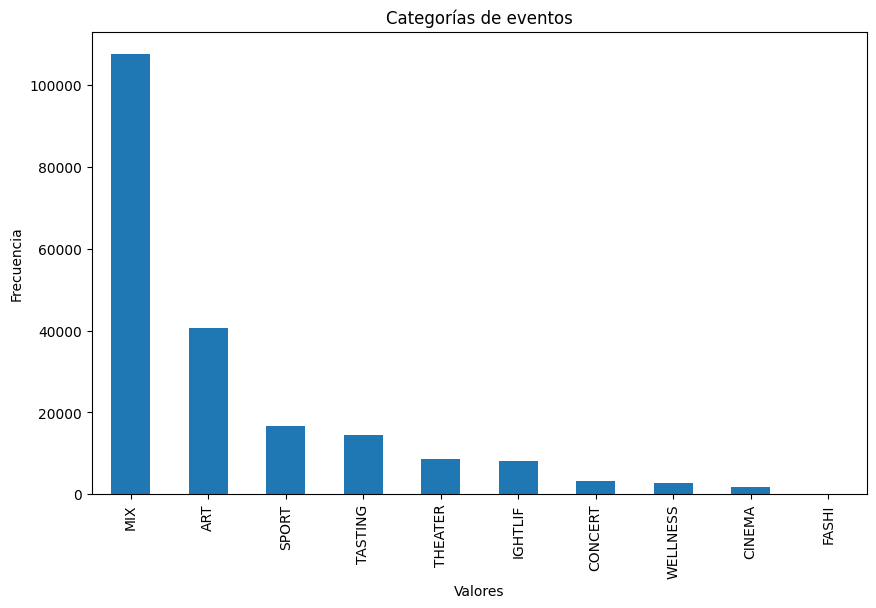

In [17]:
# Distribución valores en 'events_category'
plt.figure(figsize=(10, 6))
events_copy['event_category'].value_counts().plot(kind='bar')
plt.title('Categorías de eventos')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.show()

In [18]:
events_copy['event_category'].value_counts()

event_category
MIX         107598
ART          40586
SPORT        16535
TASTING      14433
THEATER       8515
IGHTLIF       8187
CONCERT       3309
WELLNESS      2632
CINEMA        1724
FASHI            2
Name: count, dtype: int64

In [19]:
# Sustituir valores NaN en columna 'event_category' por la moda
category_mode = events_copy['event_category'].mode()[0]                                       # Calcular la moda de la columna 'event_category'
events_copy.loc[events_copy['event_category'].isnull(), 'event_category'] = category_mode     # Rellenar los valores NaN en la columna 'event_category' con la moda calculada
events_copy['event_category'].isnull().sum()

C:\Users\Marta\AppData\Local\Temp\ipykernel_11812\844071782.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_copy.loc[events_copy['event_category'].isnull(), 'event_category'] = category_mode     # Rellenar los valores NaN en la columna 'event_category' con la moda calculada


0

#### Columnas 'state' y 'postal_code'

In [20]:
# Porcentaje de NaN en ambas columnas (%)
cantidad_nan_st = events_copy['state'].isna().sum()                 # Columna 'state'
total_filas_st = len(events_copy)                                   # Total filas en columna 'state'
porcentaje_nan_st = (cantidad_nan_st / total_filas_st) * 100        # Porcentaje de valores NaN

cantidad_nan_pc = events_copy['postal_code'].isna().sum()           # Columna 'postal_code'
total_filas_pc = len(events_copy)                                   # Total filas en columna 'postal_code'
porcentaje_nan_pc = (cantidad_nan_pc / total_filas_pc) * 100        # Porcentaje de valores NaN

print(f"El porcentaje de valores NaN en la columna 'state' es: {porcentaje_nan_st:.2f}%")
print(f"El porcentaje de valores NaN en la columna 'postal_code' es: {porcentaje_nan_pc:.2f}%")


El porcentaje de valores NaN en la columna 'state' es: 2.33%
El porcentaje de valores NaN en la columna 'postal_code' es: 1.67%


In [21]:
# Borrar filas con NaN de ambas columnas
events_copy.dropna(subset=['state'], inplace=True)
events_copy.dropna(subset=['postal_code'], inplace=True)

C:\Users\Marta\AppData\Local\Temp\ipykernel_11812\246890376.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_copy.dropna(subset=['state'], inplace=True)
C:\Users\Marta\AppData\Local\Temp\ipykernel_11812\246890376.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_copy.dropna(subset=['postal_code'], inplace=True)


### Añadir columna 'event_category' al dataframe de 'tickets'

In [22]:
# Para el estudio, es interesante que el df de 'tickets' tenga también la categoría de cada evento. La añado con función .map

event_url_category_map = events.set_index('event_url')['event_category'].to_dict()                  # Crear un diccionario de 'event_url' y 'event_category' del dataframe 'events'
tickets_copy['event_category'] = tickets_copy['event_url'].map(event_url_category_map)              # Utilizar map para asignar 'event_category' basado en 'event_url'

C:\Users\Marta\AppData\Local\Temp\ipykernel_11812\3561266227.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tickets_copy['event_category'] = tickets_copy['event_url'].map(event_url_category_map)              # Utilizar map para asignar 'event_category' basado en 'event_url'


### Arreglar tipo de datos en columnas

In [23]:
# DATAFRAME 1 -> events_copy
events_copy['datetime_local'] = pd.to_datetime(events_copy['datetime_local'])           # Modificar columna 'datime_local' a tipo datetime

# DATAFRAME 2 -> tickets_copy
tickets_copy['datetime_local'] = pd.to_datetime(tickets_copy['datetime_local'])         # Modificar columna 'datime_local' a tipo datetime
tickets_copy['ticket_id'] = tickets_copy['ticket_id'].astype(str)                       # Modificar columna 'ticket_id' a object

C:\Users\Marta\AppData\Local\Temp\ipykernel_11812\1705328025.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_copy['datetime_local'] = pd.to_datetime(events_copy['datetime_local'])           # Modificar columna 'datime_local' a tipo datetime
C:\Users\Marta\AppData\Local\Temp\ipykernel_11812\1705328025.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tickets_copy['datetime_local'] = pd.to_datetime(tickets_copy['datetime_local'])         # Modificar columna 'datime_local' a tipo datetime
C:\Users

In [24]:
tickets_copy.info(), events_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2655 entries, 0 to 2654
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   event_url       2655 non-null   object        
 1   title           2655 non-null   object        
 2   datetime_local  2655 non-null   datetime64[ns]
 3   city            2655 non-null   object        
 4   state           2655 non-null   object        
 5   country         2655 non-null   object        
 6   postal_code     2655 non-null   object        
 7   ticket_id       2655 non-null   object        
 8   ticket_price    2655 non-null   float64       
 9   total_price     2655 non-null   float64       
 10  quantity        2655 non-null   int64         
 11  event_category  2655 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 249.0+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 228279 entries, 0 to 233724
Data colu

(None, None)

In [25]:
tickets_copy.shape

(2655, 12)

In [26]:
tickets_copy.isnull().sum()

event_url         0
title             0
datetime_local    0
city              0
state             0
country           0
postal_code       0
ticket_id         0
ticket_price      0
total_price       0
quantity          0
event_category    0
dtype: int64

In [27]:
events_copy.isnull().sum()

event_url         0
event_category    0
title             0
datetime_local    0
name              0
city              0
state             0
country           0
postal_code       0
dtype: int64

### Guardar ambos .csv procesados

In [28]:
events_copy.to_csv('events_processed.csv', index=False)
tickets_copy.to_csv('tickets_processed.csv', index=False)

### ** Nota

Los datos de 'tickets' fueron scrapeados el 2023/10/08 21:48:33.